#**Código para el Demo Day del módulo 4.**



## Limpieza de datos.

Se monta el drive para los archivos necesarios.

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


Se importan los librerías necesarias.

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

Se agregan funciones necesarias para evitar repetir código.

In [ ]:
def deleting_data():
    replacing = ['2-Jan', '3-Jan', '4-Jan', '5-Jan','6-Jan', '8-Jan', '10-Jan',
                 '12-Jan', '16-Jan', '24-Jan', 'Jan-64', 'Jan-32']
    return replacing

In [ ]:
def adding_data():
    replacing = ['2 players', '3 players', '4 players', '5 players', '6 players',
                 '8 players', '10 players', '12 players', '16 players',
                 '24 players', '64 players', '32 players']
    return replacing

In [ ]:
def reading_db():
    db = '/content/drive/MyDrive/colab_bedu/proyecto_bedu/games-data-exp.csv'
    return db

In [ ]:
def writing_db():
    db = '/content/drive/MyDrive/colab_bedu/proyecto_bedu/games_rewritten.csv'
    return db

Se suben los datos en un data frame.

In [ ]:
df = pd.read_csv(reading_db(), sep=',')
df.set_index('name')
pd.set_option('display.max_columns', df.shape[0] + 1)

In [ ]:
df

,name,platform,company,r-date,score,user_score,developer,genre,players,critics,users
0,The Legend of Zelda: Ocarina of Time,Nintendo64,Nintendo,11/23/1998,99,9.1,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749
1,Tony Hawk's Pro Skater 2,PlayStation,Sony,9/20/2000,98,7.4,NeversoftEntertainment,"Sports,Alternative,Skateboarding",2-Jan,19,647
2,Grand Theft Auto IV,PlayStation3,Sony,4/29/2008,98,7.6,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806
3,SoulCalibur,Dreamcast,SEGA,9/8/1999,98,8.5,Namco,"Action,Fighting,3D",2-Jan,24,324
4,Grand Theft Auto IV,Xbox360,Microsoft,4/29/2008,98,7.9,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364
...,...,...,...,...,...,...,...,...,...,...,...
17939,Vroom in the Night Sky,Switch,Nintendo,4/5/2017,17,3.1,Poisoft,"Sports,Individual,Biking",No Online Multiplayer,15,105
17940,Leisure Suit Larry: Box Office Bust,PlayStation3,Sony,5/5/2009,17,1.9,Team17,"Action Adventure,Adventure,Third-Person,Open-W...",No Online Multiplayer,11,45
17941,Yaris,Xbox360,Microsoft,10/10/2007,17,4.3,BackboneEntertainment,"Driving,Racing,Arcade,Arcade,Automobile",2 Online,7,129
17942,Ride to Hell: Retribution,PC,Desktop,6/24/2013,16,1.3,"Eutechnyx,DeepSilver","Driving,Modern,Racing,Motorcycle,Motocross,Mod...",No info,9,581


Se checan los valores nulos en el data frame

In [ ]:
print(df.isna().sum(axis=0))

name           0
platform       0
company        0
r-date         0
score          0
user_score     0
developer      0
genre          0
players       22
critics        0
users          0
dtype: int64


In [ ]:
df_clean_na = df.copy()
df_clean_na['players'] = df_clean_na['players'].fillna(0)

In [ ]:
print(df_clean_na.isna().sum(axis=0))

name          0
platform      0
company       0
r-date        0
score         0
user_score    0
developer     0
genre         0
players       0
critics       0
users         0
dtype: int64


Vamos a extraer el año de lanzamiento

In [ ]:
df_clean_na['year'] = pd.DatetimeIndex(df_clean_na['r-date']).year
pd.set_option('display.max_columns', df_clean_na.shape[0] + 1)

In [ ]:
df_clean_na.head(5)

,name,platform,company,r-date,score,user_score,developer,genre,players,critics,users,year
0,The Legend of Zelda: Ocarina of Time,Nintendo64,Nintendo,11/23/1998,99,9.1,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749,1998
1,Tony Hawk's Pro Skater 2,PlayStation,Sony,9/20/2000,98,7.4,NeversoftEntertainment,"Sports,Alternative,Skateboarding",2-Jan,19,647,2000
2,Grand Theft Auto IV,PlayStation3,Sony,4/29/2008,98,7.6,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806,2008
3,SoulCalibur,Dreamcast,SEGA,9/8/1999,98,8.5,Namco,"Action,Fighting,3D",2-Jan,24,324,1999
4,Grand Theft Auto IV,Xbox360,Microsoft,4/29/2008,98,7.9,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364,2008


Vamos a extraer el primer género dentro de la columna "genre" y "developer". Esto para hacer un análisis menos complicado de esta columna. Se extrae la columna y se concatena con el dataframe principal, y se cambia el nombre de la columna que se creó.

In [ ]:
df_genre = df_clean_na['genre'].str.split(',', expand=True)
df_genre_dropped = df_genre.dropna(axis=1, how='any')

In [ ]:
df_genre_dropped.head(5)

,0
0,Action Adventure
1,Sports
2,Action Adventure
3,Action
4,Action Adventure


In [ ]:
df_developer = df_clean_na['developer'].str.split(',', expand=True)
df_developer_dropped = df_developer.dropna(axis=1, how='any')

In [ ]:
df_developer_dropped.head(5)

,0
0,Nintendo
1,NeversoftEntertainment
2,RockstarNorth
3,Namco
4,RockstarNorth


In [ ]:
df_2 = pd.concat([df_clean_na, df_genre_dropped], axis=1)
df_2_drop = df_2.drop(columns=['genre'])
df_2_renamed = df_2_drop.rename(columns={
    'r-date': 'release_date',
    0: 'genre'
})

In [ ]:
df_2_renamed

,name,platform,company,release_date,score,user_score,developer,players,critics,users,year,genre
0,The Legend of Zelda: Ocarina of Time,Nintendo64,Nintendo,11/23/1998,99,9.1,Nintendo,1 Player,22,5749,1998,Action Adventure
1,Tony Hawk's Pro Skater 2,PlayStation,Sony,9/20/2000,98,7.4,NeversoftEntertainment,2-Jan,19,647,2000,Sports
2,Grand Theft Auto IV,PlayStation3,Sony,4/29/2008,98,7.6,RockstarNorth,1 Player,64,3806,2008,Action Adventure
3,SoulCalibur,Dreamcast,SEGA,9/8/1999,98,8.5,Namco,2-Jan,24,324,1999,Action
4,Grand Theft Auto IV,Xbox360,Microsoft,4/29/2008,98,7.9,RockstarNorth,1 Player,86,3364,2008,Action Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...
17939,Vroom in the Night Sky,Switch,Nintendo,4/5/2017,17,3.1,Poisoft,No Online Multiplayer,15,105,2017,Sports
17940,Leisure Suit Larry: Box Office Bust,PlayStation3,Sony,5/5/2009,17,1.9,Team17,No Online Multiplayer,11,45,2009,Action Adventure
17941,Yaris,Xbox360,Microsoft,10/10/2007,17,4.3,BackboneEntertainment,2 Online,7,129,2007,Driving
17942,Ride to Hell: Retribution,PC,Desktop,6/24/2013,16,1.3,"Eutechnyx,DeepSilver",No info,9,581,2013,Driving


In [ ]:
df_3 = pd.concat([df_2_renamed, df_developer_dropped], axis = 1)
df_3_drop = df_3.drop(columns=['developer'])
df_3_renamed_3 = df_3_drop.rename(columns={
    0: 'developer'
})

In [ ]:
df_3_renamed_3.head(5)

,name,platform,company,release_date,score,user_score,players,critics,users,year,genre,developer
0,The Legend of Zelda: Ocarina of Time,Nintendo64,Nintendo,11/23/1998,99,9.1,1 Player,22,5749,1998,Action Adventure,Nintendo
1,Tony Hawk's Pro Skater 2,PlayStation,Sony,9/20/2000,98,7.4,2-Jan,19,647,2000,Sports,NeversoftEntertainment
2,Grand Theft Auto IV,PlayStation3,Sony,4/29/2008,98,7.6,1 Player,64,3806,2008,Action Adventure,RockstarNorth
3,SoulCalibur,Dreamcast,SEGA,9/8/1999,98,8.5,2-Jan,24,324,1999,Action,Namco
4,Grand Theft Auto IV,Xbox360,Microsoft,4/29/2008,98,7.9,1 Player,86,3364,2008,Action Adventure,RockstarNorth


Limpiamos los datos de los jugadores mediante las funciones establecidas.

In [ ]:
df_3_renamed_3['players'] = df_3_renamed_3['players'].replace(deleting_data(), adding_data())

Se recorre el index.

In [ ]:
df_3_renamed_3.index += 1


In [ ]:
df_3_renamed_3


,name,platform,company,release_date,score,user_score,players,critics,users,year,genre,developer
1,The Legend of Zelda: Ocarina of Time,Nintendo64,Nintendo,11/23/1998,99,9.1,1 Player,22,5749,1998,Action Adventure,Nintendo
2,Tony Hawk's Pro Skater 2,PlayStation,Sony,9/20/2000,98,7.4,2 players,19,647,2000,Sports,NeversoftEntertainment
3,Grand Theft Auto IV,PlayStation3,Sony,4/29/2008,98,7.6,1 Player,64,3806,2008,Action Adventure,RockstarNorth
4,SoulCalibur,Dreamcast,SEGA,9/8/1999,98,8.5,2 players,24,324,1999,Action,Namco
5,Grand Theft Auto IV,Xbox360,Microsoft,4/29/2008,98,7.9,1 Player,86,3364,2008,Action Adventure,RockstarNorth
...,...,...,...,...,...,...,...,...,...,...,...,...
17940,Vroom in the Night Sky,Switch,Nintendo,4/5/2017,17,3.1,No Online Multiplayer,15,105,2017,Sports,Poisoft
17941,Leisure Suit Larry: Box Office Bust,PlayStation3,Sony,5/5/2009,17,1.9,No Online Multiplayer,11,45,2009,Action Adventure,Team17
17942,Yaris,Xbox360,Microsoft,10/10/2007,17,4.3,2 Online,7,129,2007,Driving,BackboneEntertainment
17943,Ride to Hell: Retribution,PC,Desktop,6/24/2013,16,1.3,No info,9,581,2013,Driving,Eutechnyx


Checamos los tipos de datos

In [ ]:
df_3_renamed_3.dtypes

name            object
platform        object
company         object
release_date    object
score            int64
user_score      object
players         object
critics          int64
users            int64
year             int64
genre           object
developer       object
dtype: object

Necesitamos cambiar el user_score a float y release_date a un formato fecha.

In [ ]:
df_3_renamed_3['user_score'] = df_3_renamed_3['user_score'].replace('tbd', 0)

In [ ]:
df_3_renamed_3['genre'] = df_3_renamed_3['genre'].str.replace('General', 'Action Adventure')

In [ ]:
df_3_renamed_3['genre'] = df_3_renamed_3['genre'].str.replace('Japanese-Style', 'Role-Playing')

In [ ]:
df_3_renamed_3['user_score'] = df_3_renamed_3['user_score'].astype(float)

In [ ]:
conversion = {
    'release_date': 'datetime64[ms]'
}

In [ ]:
df_3_renamed_3 = df_3_renamed_3.astype(conversion)

In [ ]:
df_3_renamed_3.dtypes

name                    object
platform                object
company                 object
release_date    datetime64[ns]
score                    int64
user_score             float64
players                 object
critics                  int64
users                    int64
year                     int64
genre                   object
developer               object
dtype: object

In [ ]:
df_3_renamed_3

,name,platform,company,release_date,score,user_score,players,critics,users,year,genre,developer
1,The Legend of Zelda: Ocarina of Time,Nintendo64,Nintendo,1998-11-23,99,9.1,1 Player,22,5749,1998,Action Adventure,Nintendo
2,Tony Hawk's Pro Skater 2,PlayStation,Sony,2000-09-20,98,7.4,2 players,19,647,2000,Sports,NeversoftEntertainment
3,Grand Theft Auto IV,PlayStation3,Sony,2008-04-29,98,7.6,1 Player,64,3806,2008,Action Adventure,RockstarNorth
4,SoulCalibur,Dreamcast,SEGA,1999-09-08,98,8.5,2 players,24,324,1999,Action,Namco
5,Grand Theft Auto IV,Xbox360,Microsoft,2008-04-29,98,7.9,1 Player,86,3364,2008,Action Adventure,RockstarNorth
...,...,...,...,...,...,...,...,...,...,...,...,...
17940,Vroom in the Night Sky,Switch,Nintendo,2017-04-05,17,3.1,No Online Multiplayer,15,105,2017,Sports,Poisoft
17941,Leisure Suit Larry: Box Office Bust,PlayStation3,Sony,2009-05-05,17,1.9,No Online Multiplayer,11,45,2009,Action Adventure,Team17
17942,Yaris,Xbox360,Microsoft,2007-10-10,17,4.3,2 Online,7,129,2007,Driving,BackboneEntertainment
17943,Ride to Hell: Retribution,PC,Desktop,2013-06-24,16,1.3,No info,9,581,2013,Driving,Eutechnyx


Renombramos y actualizamos el csv.

In [ ]:
df_rewritten = df_3_renamed_3.copy()
df_rewritten.index.names = ['game_id']

In [ ]:
df_rewritten.to_csv(writing_db(), index=True, header=True)

## Análisis de los datos.

Primero, agregamos funciones que usaremos en esta sección.

In [ ]:
# Función para agrupar datos y obtener el resultado máximo de cada grupo.

def grouping_max(dataframe, groupby, agregation, criteria):
  grouping_max_data = dataframe.loc[dataframe.groupby(groupby)[agregation].idxmax()][criteria]
  return grouping_max_data

In [ ]:
# Función para normalizar una columna donde sus datos se repiten continuamente.

def one_row(dataframe, column, new_column_name,index_name):
  df_only_name = pd.DataFrame(dataframe[column], columns=[new_column_name])
  df_only_name.index.names = [index_name]
  df_only_name_no_duplicates = df_only_name.groupby(column).apply(list).reset_index()
  df_only_name_no_duplicates.index += 1
  df_only_name_no_duplicates = df_only_name_no_duplicates.drop(columns=[0])
  df_only_name_no_duplicates.index.names = [index_name]
  return df_only_name_no_duplicates

In [ ]:
# Función para filtrar datos que tengan más de una cierta cantidad de datos contados.

def filter_counter_more_than(dataframe,filter_more_than, column_name):
  df_original_count = dataframe[column_name].value_counts()
  df_count_more_than = df_original_count[df_original_count > filter_more_than]
  df_count_made = pd.DataFrame(df_count_more_than, columns=[column_name])
  df_count_made.index.names = [column_name]
  df_count_made = df_count_made.rename(columns={
    column_name: 'count'
  })
  return df_count_made

In [ ]:
# Función para normalizar los datos en un dataframe

def normalize_column(original_df,name_column, destiny_dataframe):
  df_dict = original_df.to_dict("dict")
  df_pop = df_dict.pop(name_column)
  df_inverse = {v: k for k, v in df_pop.items()}
  df_unique = destiny_dataframe.replace(df_inverse)
  return df_unique

Se ordenan los 10 juegos con mayor número de críticas de la prensa y los jugadores.

In [ ]:
df_rewritten.sort_values('critics', ascending=False).head(10)

,name,platform,company,release_date,score,user_score,players,critics,users,year,genre,developer
game_id,,,,,,,,,,,,
955,Final Fantasy VII Remake,PlayStation4,Sony,2020-04-10,87,8.1,No Online Multiplayer,126,6405,2020,Role-Playing,SquareEnix
2271,Ghost of Tsushima,PlayStation4,Sony,2020-07-17,83,9.2,No Online Multiplayer,122,17420,2020,Action Adventure,SuckerPunch
116,The Last of Us Part II,PlayStation4,Sony,2020-06-19,93,5.7,No Online Multiplayer,121,146262,2020,Action Adventure,NaughtyDog
70,God of War,PlayStation4,Sony,2018-04-20,94,9.2,No Online Multiplayer,118,16298,2018,Action Adventure,SCESantaMonica
1027,Marvel's Spider-Man,PlayStation4,Sony,2018-09-07,87,8.7,No Online Multiplayer,116,6051,2018,Action Adventure,InsomniacGames
690,Horizon Zero Dawn,PlayStation4,Sony,2017-02-28,89,8.4,No Online Multiplayer,115,9400,2017,Role-Playing,Guerrilla
4400,Paper Mario: The Origami King,Switch,Nintendo,2020-07-17,80,6.9,No Online Multiplayer,114,1462,2020,Role-Playing,IntelligentSystems
20,Super Mario Odyssey,Switch,Nintendo,2017-10-27,97,8.9,No Online Multiplayer,113,5546,2017,Action,Nintendo
164,Uncharted 4: A Thief's End,PlayStation4,Sony,2016-05-10,93,8.5,Up to 10,113,12333,2016,Action Adventure,NaughtyDog


In [ ]:
df_rewritten.sort_values('users', ascending=False).head(10)

,name,platform,company,release_date,score,user_score,players,critics,users,year,genre,developer
game_id,,,,,,,,,,,,
116,The Last of Us Part II,PlayStation4,Sony,2020-06-19,93,5.7,No Online Multiplayer,121,146262,2020,Action Adventure,NaughtyDog
14809,Warcraft III: Reforged,PC,Desktop,2020-01-28,59,0.6,Online Multiplayer,46,30532,2020,Strategy,BlizzardEntertainment
111,The Witcher 3: Wild Hunt,PC,Desktop,2015-05-18,93,9.4,No Online Multiplayer,32,17537,2015,Action RPG,CDProjektRedStudio
2271,Ghost of Tsushima,PlayStation4,Sony,2020-07-17,83,9.2,No Online Multiplayer,122,17420,2020,Action Adventure,SuckerPunch
2952,Death Stranding,PlayStation4,Sony,2019-11-08,82,7.3,No Online Multiplayer,111,16949,2019,Action,KojimaProductions
70,God of War,PlayStation4,Sony,2018-04-20,94,9.2,No Online Multiplayer,118,16298,2018,Action Adventure,SCESantaMonica
13,The Legend of Zelda: Breath of the Wild,Switch,Nintendo,2017-03-03,97,8.6,No Online Multiplayer,109,15873,2017,Action Adventure,Nintendo
216,The Witcher 3: Wild Hunt,PlayStation4,Sony,2015-05-19,92,9.2,No Online Multiplayer,79,15749,2015,Action RPG,CDProjektRedStudio
59,The Last of Us Remastered,PlayStation4,Sony,2014-07-29,95,9.2,Up to 8,70,14563,2014,Action Adventure,NaughtyDog


Los mejores titulos de TLOZ según la crítica.

In [ ]:
df_zelda = df_rewritten[df_rewritten['name'].str.startswith('The Legend of Zelda')]
df_zelda.sort_values('score', ascending = False)

,name,platform,company,release_date,score,user_score,players,critics,users,year,genre,developer
game_id,,,,,,,,,,,,
1,The Legend of Zelda: Ocarina of Time,Nintendo64,Nintendo,1998-11-23,99,9.1,1 Player,22,5749,1998,Action Adventure,Nintendo
13,The Legend of Zelda: Breath of the Wild,Switch,Nintendo,2017-03-03,97,8.6,No Online Multiplayer,109,15873,2017,Action Adventure,Nintendo
25,The Legend of Zelda: Breath of the Wild,WiiU,Nintendo,2017-03-03,96,8.2,No Online Multiplayer,13,2245,2017,Fantasy,Nintendo
35,The Legend of Zelda: Twilight Princess,GameCube,Nintendo,2006-12-11,96,8.9,1 Player,16,823,2006,Action Adventure,Nintendo
39,The Legend of Zelda: The Wind Waker,GameCube,Nintendo,2003-03-24,96,9.0,1 Player,80,1370,2003,Action Adventure,Nintendo
48,The Legend of Zelda Collector's Edition,GameCube,Nintendo,2003-11-17,95,9.0,1 Player,8,194,2003,Action Adventure,Nintendo
52,The Legend of Zelda: A Link to the Past,GameBoyAdvance,Nintendo,2002-12-03,95,9.0,No info,30,524,2002,Action Adventure,Capcom
53,The Legend of Zelda: Majora's Mask,Nintendo64,Nintendo,2000-10-25,95,9.2,1 Player,27,1198,2000,Action Adventure,Nintendo
55,The Legend of Zelda: Twilight Princess,Wii,Nintendo,2006-11-19,95,8.9,No Online Multiplayer,73,2060,2006,Action Adventure,Nintendo


Los mejores juegos de Battlefield según los jugadores.

In [ ]:
df_battlefield = df_rewritten[df_rewritten['name'].str.startswith('Battlefield')]
df_battlefield.sort_values('user_score', ascending = False)

,name,platform,company,release_date,score,user_score,players,critics,users,year,genre,developer
game_id,,,,,,,,,,,,
658,Battlefield 1942,PC,Desktop,2002-09-10,89,8.6,64 Online,27,432,2002,Action,DigitalIllusions
796,Battlefield: Bad Company 2,Xbox360,Microsoft,2010-03-02,88,8.6,Up to 24,75,929,2010,Action,EADICE
783,Battlefield: Bad Company 2,PlayStation3,Sony,2010-03-02,88,8.5,Up to 24,59,623,2010,Action,EADICE
6224,Battlefield 2142: Northern Strike,PC,Desktop,2007-03-08,77,8.5,64 Online,15,50,2007,Action,EADICE
340,Battlefield 2,PC,Desktop,2005-06-21,91,8.4,64 Online,55,1017,2005,Action,DigitalIllusions
4189,Battlefield 2: Modern Combat,PlayStation2,Sony,2005-10-24,80,8.3,32 Online,42,81,2005,Action,DigitalIllusions
974,Battlefield: Bad Company 2,PC,Desktop,2010-03-02,87,8.2,No info,46,1733,2010,Action,EADICE
876,Battlefield: Bad Company 2 Vietnam,PlayStation3,Sony,2010-12-21,88,8.2,No info,16,73,2010,Action,EADICE
4341,Battlefield 2: Modern Combat,Xbox,Microsoft,2005-10-24,80,8.2,32 Online,49,30,2005,Action,DigitalIllusions


Juegos que tienen "No Info" en la columna de numero de jugadores

In [ ]:
df_rewritten['players'].value_counts()

No Online Multiplayer    4792
No info                  4430
1 Player                 2032
2 players                1212
4 players                 962
Up to 4                   583
Up to 8                   416
2                         402
2  Online                 386
Online Multiplayer        375
4  Online                 282
8 players                 279
8  Online                 209
Up to 16                  157
Up to 12                  147
Up to 6                   135
Massively Multiplayer     120
Up to 10                  108
16  Online                104
16 players                 89
6  Online                  69
6 players                  63
32 players                 41
32  Online                 40
Up to 22                   36
10  Online                 35
Up to 24                   30
Up to 18                   29
Up to 20                   28
3 players                  27
12  Online                 27
Up to 3                    26
Up to 32                   25
Up to 40  

Creamos un dataframe para asignar un ID a cada desarrollador. Tammbien eliminamos los duplicados.

In [ ]:
df_only_developers_name_no_duplicates = one_row(df_rewritten,'developer','developer','developer_ID')
df_only_developers_name_no_duplicates

,developer
developer_ID,
1,.theprodukkt
2,101%
3,10tacleStudios
4,10tons
5,10tonsEntertainment
...,...
3557,tobyfox
3558,winterworks
3559,xiigames


Creamos un dataframe para determinar los desarrolladores con más de 10 juegos en la base de datos.

In [ ]:
df_developer_count_more_than_10 = filter_counter_more_than(df_rewritten,10,'developer')
df_developer_count_more_than_10

,count
developer,
Capcom,322
TelltaleGames,243
EASports,203
Nintendo,186
Konami,185
...,...
HerInteractive,11
ZeniMaxMedia,11
AtomicPlanetEntertainment,11


Hacemos similar a lo anterior, pero con los géneros.

In [ ]:
df_only_genre_name_no_duplicates = one_row(df_rewritten, 'genre', 'genre', 'genre_ID')
df_only_genre_name_no_duplicates

,genre
genre_ID,
1,2D
2,3D
3,Action
4,Action Adventure
5,Action RPG
...,...
59,Turn-Based
60,Tycoon
61,Virtual Life


Normalizamos la columna de géneros y desarrolladores

In [ ]:
def normalize_column(original_df,name_column, destiny_dataframe):
  df_dict = original_df.to_dict("dict")
  df_pop = df_dict.pop(name_column)
  df_inverse = {v: k for k, v in df_pop.items()}
  df_unique = destiny_dataframe.replace(df_inverse)
  return df_unique

In [ ]:
df_normalized = normalize_column(df_only_genre_name_no_duplicates,'genre',df_rewritten)

In [ ]:
df_normalized = normalize_column(df_only_developers_name_no_duplicates,'developer',df_normalized)

In [ ]:
df_normalized

,name,platform,company,release_date,score,user_score,players,critics,users,year,genre,developer
genre_ID,,,,,,,,,,,,
1,The Legend of Zelda: Ocarina of Time,Nintendo64,2060,1998-11-23,99,9.1,1 Player,22,5749,1998,4,2060
2,Tony Hawk's Pro Skater 2,PlayStation,Sony,2000-09-20,98,7.4,2 players,19,647,2000,53,2029
3,Grand Theft Auto IV,PlayStation3,Sony,2008-04-29,98,7.6,1 Player,64,3806,2008,4,2557
4,SoulCalibur,Dreamcast,SEGA,1999-09-08,98,8.5,2 players,24,324,1999,3,2000
5,Grand Theft Auto IV,Xbox360,Microsoft,2008-04-29,98,7.9,1 Player,86,3364,2008,4,2557
...,...,...,...,...,...,...,...,...,...,...,...,...
17940,Vroom in the Night Sky,Switch,2060,2017-04-05,17,3.1,No Online Multiplayer,15,105,2017,53,2330
17941,Leisure Suit Larry: Box Office Bust,PlayStation3,Sony,2009-05-05,17,1.9,No Online Multiplayer,11,45,2009,4,3018
17942,Yaris,Xbox360,Microsoft,2007-10-10,17,4.3,2 Online,7,129,2007,16,281


In [ ]:
df_normalized.index.names = ['game_ID']
df_normalized.rename(columns = {'genre':'genre_ID', 'developer':'developer_ID'}, inplace = True)

In [ ]:
list(df_normalized)

['name',
 'platform',
 'company',
 'release_date',
 'score',
 'user_score',
 'players',
 'critics',
 'users',
 'year',
 'genre_ID',
 'developer_ID']

In [ ]:
df_normalized

,name,platform,company,release_date,score,user_score,players,critics,users,year,genre_ID,developer_ID
game_ID,,,,,,,,,,,,
1,The Legend of Zelda: Ocarina of Time,Nintendo64,2060,1998-11-23,99,9.1,1 Player,22,5749,1998,4,2060
2,Tony Hawk's Pro Skater 2,PlayStation,Sony,2000-09-20,98,7.4,2 players,19,647,2000,53,2029
3,Grand Theft Auto IV,PlayStation3,Sony,2008-04-29,98,7.6,1 Player,64,3806,2008,4,2557
4,SoulCalibur,Dreamcast,SEGA,1999-09-08,98,8.5,2 players,24,324,1999,3,2000
5,Grand Theft Auto IV,Xbox360,Microsoft,2008-04-29,98,7.9,1 Player,86,3364,2008,4,2557
...,...,...,...,...,...,...,...,...,...,...,...,...
17940,Vroom in the Night Sky,Switch,2060,2017-04-05,17,3.1,No Online Multiplayer,15,105,2017,53,2330
17941,Leisure Suit Larry: Box Office Bust,PlayStation3,Sony,2009-05-05,17,1.9,No Online Multiplayer,11,45,2009,4,3018
17942,Yaris,Xbox360,Microsoft,2007-10-10,17,4.3,2 Online,7,129,2007,16,281


Hacemos un análisis tipo resumen (media, mediana y desviación estándar) de los géneros con más de 100 juegos.

In [ ]:
df_genre_count_more_than_100 = filter_counter_more_than(df_rewritten,100,'genre')
df_genre_count_more_than_100

,count
genre,
Action,6007
Action Adventure,2454
Role-Playing,1718
Sports,1588
Strategy,1435
Miscellaneous,1265
Adventure,1083
Driving,949
Simulation,565


In [ ]:
df_summary_genre = df_rewritten.groupby('genre')['score'].agg(['mean', 'median', 'std'])
df_summary_genre_count = pd.concat([df_summary_genre, df_genre_count_more_than_100], axis = 1)
df_summary_genre_count = df_summary_genre_count.dropna(axis=0, how='any')
df_summary_genre_count

,mean,median,std,count
genre,,,,
Action,69.196937,71.0,13.000717,6007.0
Action Adventure,70.369193,72.0,12.803630,2454.0
Adventure,70.003693,72.0,10.535478,1083.0
Driving,69.436249,71.0,13.394666,949.0
Miscellaneous,69.860079,72.0,11.602400,1265.0
Puzzle,72.715116,74.0,8.910550,172.0
Racing,71.050980,71.0,10.740375,255.0
Role-Playing,72.502328,74.0,11.401128,1718.0
Simulation,68.589381,70.0,11.347566,565.0


Obtenemos el número de juegos por plataforma y su "resumen" (promedio, mediana y desviación estándar)

In [ ]:
df_summary_platforms = df_rewritten.groupby('platform')['score'].agg(['mean', 'median', 'std'])
df_count_platforms = df_rewritten.groupby('platform').size()
df_count_platforms = pd.DataFrame(df_count_platforms, columns=['count'])
df_summary_platforms_count = pd.concat([df_count_platforms,df_summary_platforms], axis=1)
df_summary_platforms_count

,count,mean,median,std
platform,,,,
3DS,400,69.607500,71.0,12.251068
DS,730,66.480822,68.0,12.589991
Dreamcast,125,73.696000,76.0,13.091011
GameBoyAdvance,444,68.504505,70.0,13.052161
GameCube,452,70.747788,71.0,12.868881
Nintendo64,70,78.528571,81.0,13.242139
PC,4592,71.551394,73.0,11.765477
PSP,513,68.493177,69.0,11.244115
PlayStation,188,72.978723,75.5,15.939041


Eliminamos las plataformas que tengan menos de 10 juegos en la lista.

In [ ]:
df_summary_platforms_count.drop(df_summary_platforms_count[(df_summary_platforms_count['count'] < 10)].index, inplace=True)
df_summary_platforms_count

,count,mean,median,std
platform,,,,
3DS,400,69.607500,71.0,12.251068
DS,730,66.480822,68.0,12.589991
Dreamcast,125,73.696000,76.0,13.091011
GameBoyAdvance,444,68.504505,70.0,13.052161
GameCube,452,70.747788,71.0,12.868881
Nintendo64,70,78.528571,81.0,13.242139
PC,4592,71.551394,73.0,11.765477
PSP,513,68.493177,69.0,11.244115
PlayStation,188,72.978723,75.5,15.939041


Checamos la aceptación que tienen los usuarios por compañía y consola.

In [ ]:
df_count_companies_platforms = df_rewritten.groupby(['company','platform'])['user_score'].size()
df_summary_companies_platforms = df_rewritten.groupby(['company','platform'])['user_score'].agg(['mean', 'median', 'std'])
df_summary_platforms_companies_count = pd.concat([df_summary_companies_platforms,df_count_companies_platforms], axis=1)
df_summary_platforms_companies_count= df_summary_platforms_companies_count.rename(columns={
    'user_score': 'count'
})
df_summary_platforms_companies_count.drop(df_summary_platforms_companies_count[(df_summary_platforms_companies_count['count'] < 10)].index, inplace=True)
df_summary_platforms_companies_count

mean  median       std  count
company   platform                                          
Desktop   PC               6.648824    7.10  1.822876   4592
Microsoft Xbox             6.020050    7.30  2.984119    793
          Xbox360          6.582353    7.10  1.917227   1666
          XboxOne          5.849106    6.50  2.243014   1118
Nintendo  3DS              6.822750    7.40  1.724730    400
          DS               5.600959    7.20  3.201892    730
          GameBoyAdvance   5.809234    7.65  3.447370    444
          GameCube         6.838496    7.80  2.457474    452
          Nintendo64       8.080000    8.25  0.771710     70
          Switch           6.425490    7.30  2.477573   1122
          Wii              6.482229    7.30  2.403583    664
          WiiU             7.201075    7.50  1.306160    186
SEGA      Dreamcast        7.696000    8.00  1.587928    125
Sony      PSP              6.578363    7.40  2.469221    513
          PlayStation      6.671809    7.95  3.016586    188
          PlayStation2     7.019887    7.90  2.387408   1418
          PlayStation3     6.657210    7.10  1.754028   1269
          PlayStation4     6.145280    6.60  1.858742   1928
          PlayStationVita  7.143580    7.40  1.377089    257

Hacemos un conteo de los juegos por año, que están en la base de datos.

In [ ]:
df_year_games_count = df_rewritten.groupby('year')['name'].size()

In [ ]:
df_year_games_count

year
1995       1
1996      20
1997      27
1998      45
1999      52
2000     355
2001     546
2002     786
2003     811
2004     724
2005     859
2006     892
2007     936
2008     944
2009     970
2010     847
2011     861
2012     795
2013     766
2014     781
2015     864
2016     982
2017    1059
2018    1147
2019    1010
2020     864
Name: name, dtype: int64

In [ ]:
df_year_games = df_rewritten.sort_values('year')

In [ ]:
df_year_games.index.names = ["game_id"]
df_year_games

,name,platform,company,release_date,score,user_score,players,critics,users,year,genre,developer
game_id,,,,,,,,,,,,
1375,Full Throttle,PC,Desktop,1995-04-30,86,8.6,No info,8,181,1995,Adventure,LucasArts
589,Tekken 2,PlayStation,Sony,1996-08-25,89,8.4,2 players,8,165,1996,Action,Namco
16296,Harvester,PC,Desktop,1996-08-31,53,7.9,No Online Multiplayer,8,47,1996,Adventure,DigiFXInteractive
632,Duke Nukem 3D,PC,Desktop,1996-01-29,89,8.7,4 players,8,461,1996,Action,3DRealms
86,Sid Meier's Civilization II,PC,Desktop,1996-02-29,94,8.8,1 Player,7,450,1996,Strategy,MPSLabs
...,...,...,...,...,...,...,...,...,...,...,...,...
1290,Panzer Corps 2,PC,Desktop,2020-03-19,86,5.9,Online Multiplayer,14,36,2020,Strategy,FlashbackGames
4184,Faeria,Switch,Nintendo,2020-08-13,80,7.3,No Online Multiplayer,11,16,2020,Miscellaneous,AbrakamSA
10829,Raji: An Ancient Epic,Switch,Nintendo,2020-08-18,69,7.8,No Online Multiplayer,21,56,2020,Adventure,NoddingHeadsGames


Checamos qué juegos fueron los mejores calificados según la crítica.

In [ ]:
df_best_games_year = df_year_games[['name','year','score']]

In [ ]:
df_best_games_year

,name,year,score
game_id,,,
1375,Full Throttle,1995,86
589,Tekken 2,1996,89
16296,Harvester,1996,53
632,Duke Nukem 3D,1996,89
86,Sid Meier's Civilization II,1996,94
...,...,...,...
1290,Panzer Corps 2,2020,86
4184,Faeria,2020,80
10829,Raji: An Ancient Epic,2020,69


In [ ]:
df_best_games_names = grouping_max(df_best_games_year,'year','score','name')
df_best_games_scores = grouping_max(df_best_games_year,'year','score','score')
df_best_games_years = grouping_max(df_best_games_year,'year','score','year')
df_best_games_by_year = pd.concat([df_best_games_names,df_best_games_scores,df_best_games_years], axis = 1)

df_best_games_by_year

,name,score,year
game_id,,,
1375,Full Throttle,86,1995
86,Sid Meier's Civilization II,94,1996
27,GoldenEye 007,96,1997
1,The Legend of Zelda: Ocarina of Time,99,1998
4,SoulCalibur,98,1999
2,Tony Hawk's Pro Skater 2,98,2000
14,Tony Hawk's Pro Skater 3,97,2001
18,Metroid Prime,97,2002
39,The Legend of Zelda: The Wind Waker,96,2003


Hacemos lo mismo, pero con las calificaciones de los jugadores.

In [ ]:
df_best_games_year_gamers = df_year_games[['name','year','user_score']]
df_best_games_year_gamers = df_best_games_year_gamers.sort_values('year')
df_best_games_names_gamers = grouping_max(df_best_games_year_gamers,'year','user_score','name')
df_best_games_scores_gamers = grouping_max(df_best_games_year_gamers ,'year','user_score','user_score')
df_best_games_years_gamers = grouping_max(df_best_games_year_gamers ,'year','user_score','year')
df_best_games_by_year_gamers = pd.concat([df_best_games_names_gamers,df_best_games_scores_gamers,df_best_games_years_gamers], axis = 1)
df_best_games_by_year_gamers

,name,user_score,year
game_id,,,
1375,Full Throttle,8.6,1995
110,Super Mario 64,9.2,1996
161,Castlevania: Symphony of the Night,9.2,1997
1922,Xenogears,9.2,1998
3163,Suikoden II,9.2,1999
6069,Resident Evil 2,9.2,2000
716,Shenmue II,9.2,2001
295,Resident Evil,9.2,2002
778,Warcraft III: The Frozen Throne,9.2,2003




---



##Módulo 4

In [ ]:
def drop_outlayer(df_outlier, df_original):
    iqr = df_outlier.quantile(0.75) - df_outlier.quantile(0.25)
    filtro_inferior = df_outlier > df_outlier.quantile(0.25) - (iqr * 1.5)
    filtro_superior = df_outlier < df_outlier.quantile(0.75) + (iqr * 1.5)
    df_f = df_original[(filtro_inferior) & (filtro_superior)]
    return df_f


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

Checamos los valores atípicos, con respecto al número de críticas.





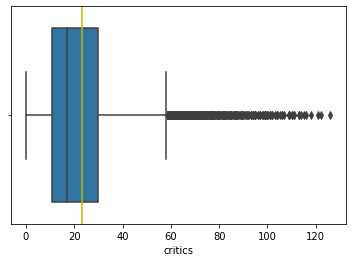

In [ ]:
sns.boxplot(x=df_rewritten['critics'])
plt.axvline(df_rewritten['critics'].mean(), c='y');

Existen valores atípicos con críticas más allá de las 60 críticas. Sacamos el Score-IQR y vemos cómo queda nuestro boxplot.

In [ ]:
df_filtered = drop_outlayer(df_rewritten['critics'], df_rewritten)

In [ ]:
df_filtered = df_filtered.reset_index(drop=True)
df_filtered.index += 1
df_filtered.index.name = 'game_ID'

In [ ]:
df_filtered            

,name,platform,company,release_date,score,user_score,players,critics,users,year,genre,developer
game_ID,,,,,,,,,,,,
1,The Legend of Zelda: Ocarina of Time,Nintendo64,Nintendo,1998-11-23,99,9.1,1 Player,22,5749,1998,Action Adventure,Nintendo
2,Tony Hawk's Pro Skater 2,PlayStation,Sony,2000-09-20,98,7.4,2 players,19,647,2000,Sports,NeversoftEntertainment
3,SoulCalibur,Dreamcast,SEGA,1999-09-08,98,8.5,2 players,24,324,1999,Action,Namco
4,Red Dead Redemption 2,XboxOne,Microsoft,2018-10-26,97,7.8,Up to 32,33,3186,2018,Action Adventure,RockstarGames
5,Grand Theft Auto V,XboxOne,Microsoft,2014-11-18,97,7.8,Up to 30,14,1285,2014,Action Adventure,RockstarNorth
...,...,...,...,...,...,...,...,...,...,...,...,...
16982,Vroom in the Night Sky,Switch,Nintendo,2017-04-05,17,3.1,No Online Multiplayer,15,105,2017,Sports,Poisoft
16983,Leisure Suit Larry: Box Office Bust,PlayStation3,Sony,2009-05-05,17,1.9,No Online Multiplayer,11,45,2009,Action Adventure,Team17
16984,Yaris,Xbox360,Microsoft,2007-10-10,17,4.3,2 Online,7,129,2007,Driving,BackboneEntertainment


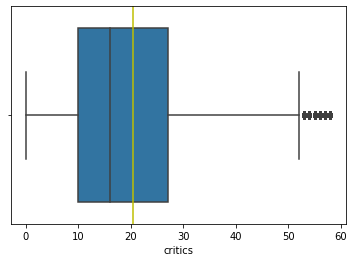

In [ ]:
sns.boxplot(x=df_filtered['critics'])
plt.axvline(df_filtered['critics'].mean(), c='y');

Como se puede observar, de los 17944 títulos que se encuentran en la lista, se sesgaron aproximadamente la siguiente cantidad:

In [ ]:
sesgo = ((17944 - 16986)/17944)*100
sesgo

5.33883192153366

Solamente el 5.33%, lo cual estamos en un rango adecuado.

Obtenemos los datos de localización necesarios para el puntaje de la prensa y los jugadores.

In [ ]:
mean_critics = df_filtered['score'].mean()
median_critics = df_filtered['score'].median()
std_critics = df_filtered['score'].std()

In [ ]:
mean_critics 

69.79447780525139

In [ ]:
median_critics

72.0

In [ ]:
std_critics

12.31869400867527

In [ ]:
mean_users = df_filtered['user_score'].mean()
median_users = df_filtered['user_score'].median()
std_users = df_filtered['user_score'].std()

In [ ]:
mean_users

6.425668197338985

In [ ]:
median_users

7.1

In [ ]:
std_users

2.2567212098822016

Obtenemos el histograma con respecto a las puntuaciones de la crítica y los jugadores.

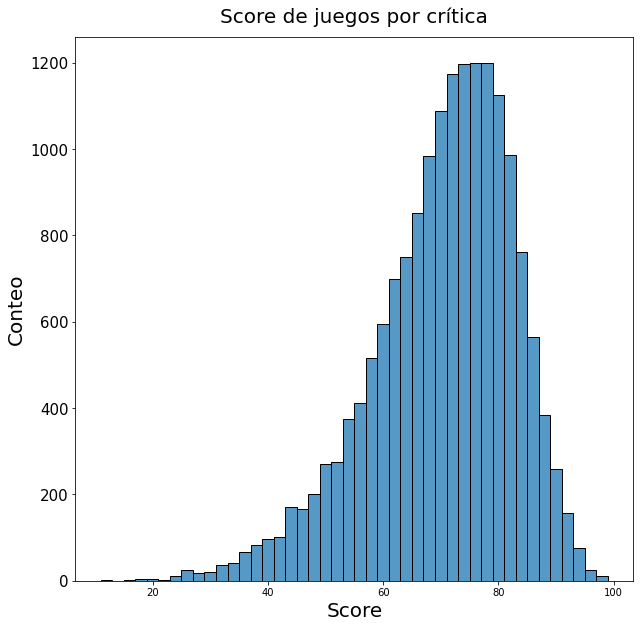

In [ ]:
plt.figure(figsize = (10,10))
plot_critics = sns.histplot(df_filtered['score'],bins = 44);
sns.set(style="white")
plot_critics.set_title('Score de juegos por crítica',  fontsize=20, pad=15);
plot_critics.set_xlabel("Score", fontsize = 20)
plot_critics.set_ylabel("Conteo", fontsize = 20)
#plot_critics.set_xticklabels(plot_critics.get_xticklabels(), fontsize=15);
plt.yticks(fontsize = 15);

Convertimos los 0 en NaN para el histograma de los score de los jugadores.

In [ ]:
df_filtered.replace(0, np.nan, inplace=True)

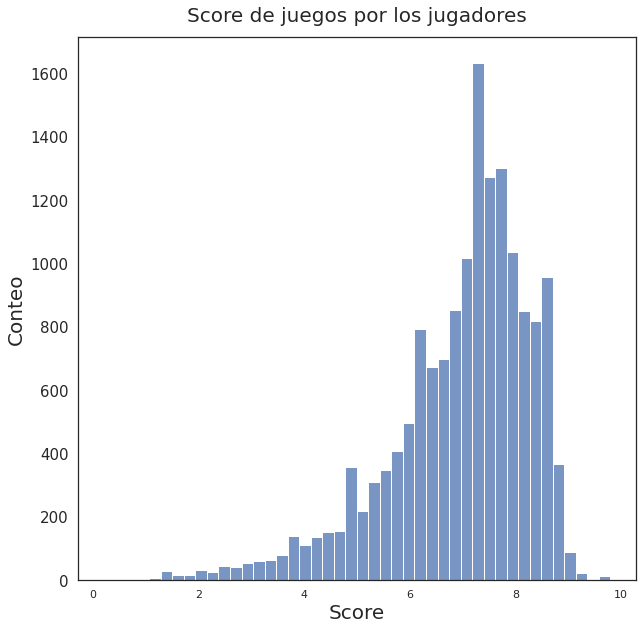

In [ ]:
plt.figure(figsize = (10,10))
plot_users = sns.histplot(df_filtered['user_score'],bins = 44);
sns.set(style="white")
plot_users.set_title('Score de juegos por los jugadores',  fontsize=20, pad=15);
plot_users.set_xlabel("Score", fontsize = 20)
plot_users.set_ylabel("Conteo", fontsize = 20)
#plot_critics.set_xticklabels(plot_users.get_xticklabels(), fontsize=15);
plt.yticks(fontsize = 15);

Obtenemos el tipo de dato de cada variable.

In [ ]:
df_filtered.dtypes

name                    object
platform                object
company                 object
release_date    datetime64[ns]
score                    int64
user_score             float64
players                 object
critics                float64
users                  float64
year                     int64
genre                   object
developer               object
dtype: object

Vamos a intentar sacar el ranking de los juegos, esta vez por su score según su percentil.

In [ ]:
print(f"Mínimo: {df_filtered['score'].min()}")
print(f"Percentil 25: {df_filtered['score'].quantile(0.25)}")
print(f"Percentil 50: {df_filtered['score'].median()}")
print(f"Percentil 75: {df_filtered['score'].quantile(0.75)}")
print(f"Máximo: {df_filtered['score'].max()}")

Mínimo: 11
Percentil 25: 63.0
Percentil 50: 72.0
Percentil 75: 79.0
Máximo: 99


In [ ]:
df_filtered['ranking'] = pd.NaT
df_filtered['ranking'].mask(df_filtered['score'] >= df_filtered['score'].quantile(0.75) ,'Great', inplace=True)
df_filtered['ranking'].mask(df_filtered['score'] < df_filtered['score'].quantile(0.75) ,'Good', inplace=True)
df_filtered['ranking'].mask(df_filtered['score'] < df_filtered['score'].median() ,'Average', inplace=True)
df_filtered['ranking'].mask(df_filtered['score'] < df_filtered['score'].quantile(0.25) ,'Bad', inplace=True)

In [ ]:
df_filtered


,name,platform,company,release_date,score,user_score,players,critics,users,year,genre,developer,ranking
game_ID,,,,,,,,,,,,,
1,The Legend of Zelda: Ocarina of Time,Nintendo64,Nintendo,1998-11-23,99,9.1,1 Player,22.0,5749.0,1998,Action Adventure,Nintendo,Great
2,Tony Hawk's Pro Skater 2,PlayStation,Sony,2000-09-20,98,7.4,2 players,19.0,647.0,2000,Sports,NeversoftEntertainment,Great
3,SoulCalibur,Dreamcast,SEGA,1999-09-08,98,8.5,2 players,24.0,324.0,1999,Action,Namco,Great
4,Red Dead Redemption 2,XboxOne,Microsoft,2018-10-26,97,7.8,Up to 32,33.0,3186.0,2018,Action Adventure,RockstarGames,Great
5,Grand Theft Auto V,XboxOne,Microsoft,2014-11-18,97,7.8,Up to 30,14.0,1285.0,2014,Action Adventure,RockstarNorth,Great
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16982,Vroom in the Night Sky,Switch,Nintendo,2017-04-05,17,3.1,No Online Multiplayer,15.0,105.0,2017,Sports,Poisoft,Bad
16983,Leisure Suit Larry: Box Office Bust,PlayStation3,Sony,2009-05-05,17,1.9,No Online Multiplayer,11.0,45.0,2009,Action Adventure,Team17,Bad
16984,Yaris,Xbox360,Microsoft,2007-10-10,17,4.3,2 Online,7.0,129.0,2007,Driving,BackboneEntertainment,Bad


Filtramos las variables numéricas en nuestro dataset, esto para saber si existen correlaciones.

In [ ]:
df_numeric = df_filtered.drop(columns = ['name','platform','company','players','genre','developer','release_date','year'])
df_numeric.head(5)

,score,user_score,critics,users,ranking
game_ID,,,,,
1,99,9.1,22.0,5749.0,Great
2,98,7.4,19.0,647.0,Great
3,98,8.5,24.0,324.0,Great
4,97,7.8,33.0,3186.0,Great
5,97,7.8,14.0,1285.0,Great


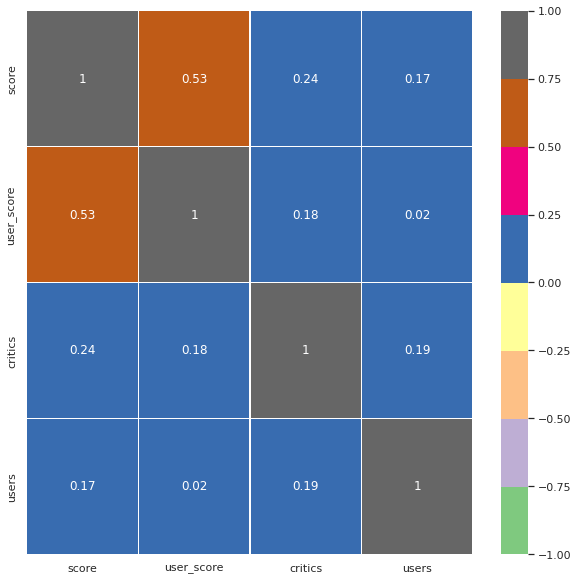

In [ ]:
plt.figure(figsize=(10, 10))
corr_variables = sns.heatmap(df_numeric.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5, cmap="Accent")

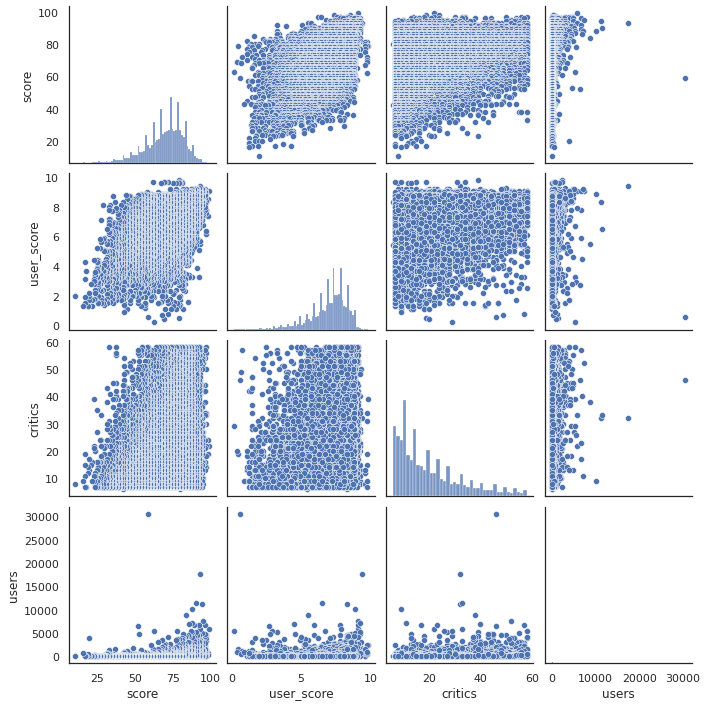

In [ ]:
pairplot_variables = sns.pairplot(df_numeric);

Una aproximación lineal no resulta conveniente en este caso.

Procedemos a trabajar ahora con las variables categóricas, mediante crosstab.

In [ ]:
crosstab_companies = pd.crosstab(df_filtered["company"], df_filtered["ranking"])
crosstab_companies

ranking,Average,Bad,Good,Great
company,,,,
Desktop,1086,892,1209,1321
Microsoft,783,876,769,809
Nintendo,973,1081,920,910
SEGA,23,27,24,51
Sony,1385,1319,1269,1259


In [ ]:
crosstab_platforms = pd.crosstab(df_filtered["platform"], df_filtered["ranking"], margins=True, margins_name="Total")
crosstab_platforms.drop(crosstab_platforms[(crosstab_platforms['Total'] < 10)].index, inplace=True)
crosstab_platforms


ranking,Average,Bad,Good,Great,Total
platform,,,,,
3DS,93,104,85,68,350
DS,202,254,149,110,715
Dreamcast,23,27,24,51,125
GameBoyAdvance,99,138,102,105,444
GameCube,120,112,85,128,445
Nintendo64,5,10,14,41,70
PC,1086,892,1207,1319,4504
PSP,141,141,121,95,498
PlayStation,33,43,33,79,188


Estaremos trabajando con variables categóricas en todo momento. Sacamos una gráfica de barras de la cantidad de juegos según su ranking.

In [ ]:
counts = df_filtered["ranking"].value_counts()


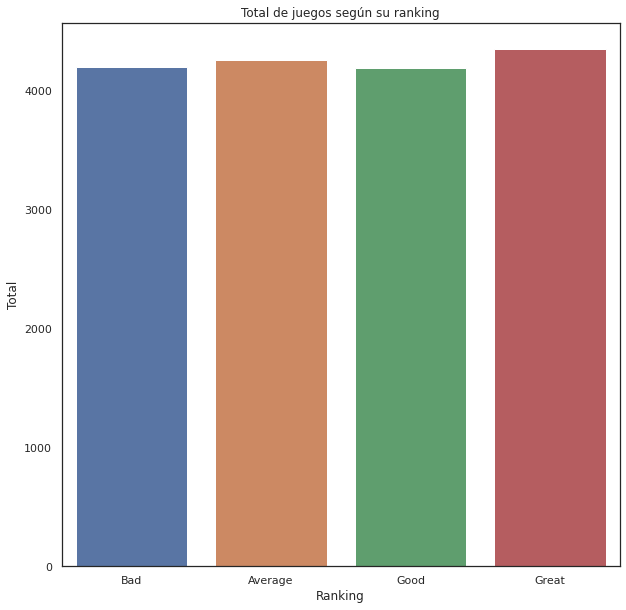

In [ ]:
plt.figure(figsize=(10,10))
counts = counts[['Bad','Average','Good','Great']]
plot_ranking = sns.barplot(x=counts.index, y=counts);
plot_ranking.set_title("Total de juegos según su ranking")
plot_ranking.set(xlabel="Ranking")
plot_ranking.set(ylabel="Total");

La cantidad de juegos según su ranking son muy similares entre sí. Primero haremos una gráfica de barras apilada donde se muestre la proporción del ranking de los juegos dividido entre compañía.

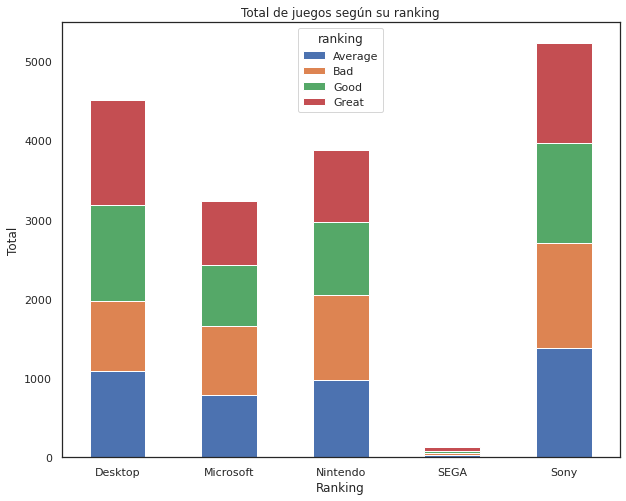

In [ ]:
figure_stacked = plt.figure(figsize=(10,8))
ax = figure_stacked.add_subplot()

plot_stacked = crosstab_companies.plot(kind='bar', stacked=True, ax=ax)
plot_stacked.set_title("Total de juegos según su ranking")
plot_stacked.set(xlabel="Ranking")
plot_stacked.set(ylabel="Total");
plot_stacked.set_xticklabels(ax.get_xticklabels(), rotation=0);

Observamos cómo se distribuye el ranking de los juegos según su compañía, acorde a la crítica especializada. Ahora, vamos con las suposiciones según la plataforma mediante un treemap.

In [ ]:
df_treemap = df_filtered.groupby('name')[['platform','ranking']].max()
df_treemap['count'] = 1
treemap_platform = px.treemap(df_treemap, path=['platform', 'ranking'], values='count')
treemap_platform.show()

Haremos lo mismo, escogiendo una escala arbitraría donde se considera un juego igual o mayor a 80 como muy bueno, 79 a 60 como bueno, 59 a 40 como regular, 39 a 20 como malo y menor a 20 como terrible. 

In [ ]:
df_filtered_alternative = df_filtered.copy()
df_filtered['ranking'] = pd.NaT
df_filtered_alternative['ranking'].mask(df_filtered_alternative['score'] >= 80 ,'Great', inplace=True)
df_filtered_alternative['ranking'].mask(df_filtered_alternative['score'] < 80 ,'Good', inplace=True)
df_filtered_alternative['ranking'].mask(df_filtered_alternative['score'] < 60 ,'Regular', inplace=True)
df_filtered_alternative['ranking'].mask(df_filtered_alternative['score'] < 40 ,'Bad', inplace=True)
df_filtered_alternative['ranking'].mask(df_filtered_alternative['score'] < 20 ,'Terrible', inplace=True)

In [ ]:
df_filtered_alternative = df_filtered_alternative[df_filtered_alternative['company'] != 'SEGA']
df_filtered_alternative = df_filtered_alternative[df_filtered_alternative['platform'] != 'PlayStation5']
df_filtered_alternative = df_filtered_alternative[df_filtered_alternative['platform'] != 'XboxSeriesX']
df_filtered_alternative = df_filtered_alternative[df_filtered_alternative['platform'] != 'Stadia']

In [ ]:
df_filtered_alternative

,name,platform,company,release_date,score,user_score,players,critics,users,year,genre,developer,ranking
game_ID,,,,,,,,,,,,,
1,The Legend of Zelda: Ocarina of Time,Nintendo64,Nintendo,1998-11-23,99,9.1,1 Player,22.0,5749.0,1998,Action Adventure,Nintendo,Great
2,Tony Hawk's Pro Skater 2,PlayStation,Sony,2000-09-20,98,7.4,2 players,19.0,647.0,2000,Sports,NeversoftEntertainment,Great
4,Red Dead Redemption 2,XboxOne,Microsoft,2018-10-26,97,7.8,Up to 32,33.0,3186.0,2018,Action Adventure,RockstarGames,Great
5,Grand Theft Auto V,XboxOne,Microsoft,2014-11-18,97,7.8,Up to 30,14.0,1285.0,2014,Action Adventure,RockstarNorth,Great
6,Grand Theft Auto V,PlayStation3,Sony,2013-09-17,97,8.3,Up to 16,50.0,4568.0,2013,Modern,RockstarNorth,Great
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16982,Vroom in the Night Sky,Switch,Nintendo,2017-04-05,17,3.1,No Online Multiplayer,15.0,105.0,2017,Sports,Poisoft,Terrible
16983,Leisure Suit Larry: Box Office Bust,PlayStation3,Sony,2009-05-05,17,1.9,No Online Multiplayer,11.0,45.0,2009,Action Adventure,Team17,Terrible
16984,Yaris,Xbox360,Microsoft,2007-10-10,17,4.3,2 Online,7.0,129.0,2007,Driving,BackboneEntertainment,Terrible


In [ ]:
df_numeric_alternative = df_filtered_alternative.drop(columns = ['name','platform','company','players','genre','developer','release_date','year'])
df_numeric_alternative.head(5)

,score,user_score,critics,users,ranking
game_ID,,,,,
1,99,9.1,22.0,5749.0,Great
2,98,7.4,19.0,647.0,Great
4,97,7.8,33.0,3186.0,Great
5,97,7.8,14.0,1285.0,Great
6,97,8.3,50.0,4568.0,Great


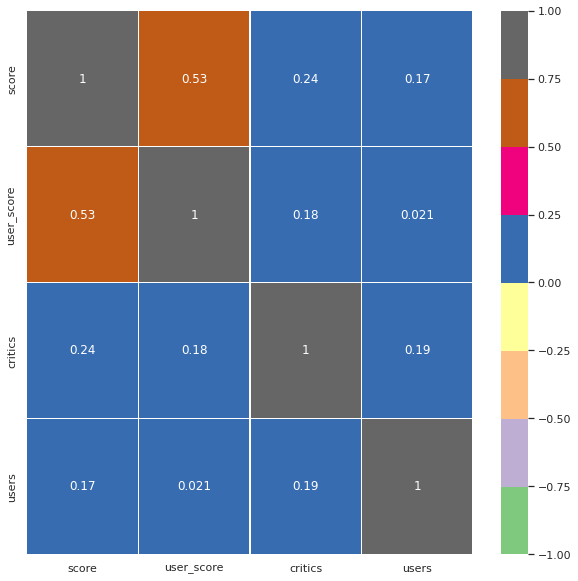

In [ ]:
plt.figure(figsize=(10, 10))
corr_variables_alternative = sns.heatmap(df_numeric_alternative.corr(), vmin=-1, vmax=1, annot=True, linewidths=.5, cmap="Accent")

Aún no existe una relación estrecha entre todas las variables de manera lineal. Seguimos con el mismo proceso de las gráficas de barras y el treemap.

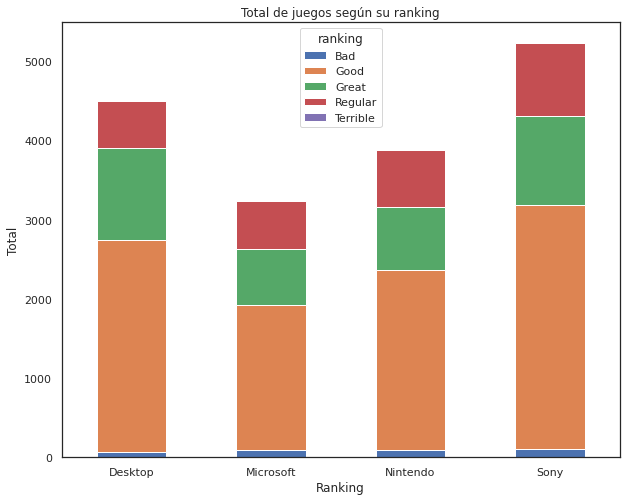

In [ ]:
crosstab_companies_alternative = pd.crosstab(df_filtered_alternative["company"], df_filtered_alternative["ranking"])
figure_stacked_alternative = plt.figure(figsize=(10,8))
ax = figure_stacked_alternative.add_subplot()

plot_stacked_alternative = crosstab_companies_alternative.plot(kind='bar', stacked=True, ax=ax)
plot_stacked_alternative.set_title("Total de juegos según su ranking")
plot_stacked_alternative.set(xlabel="Ranking")
plot_stacked_alternative.set(ylabel="Total");
plot_stacked_alternative.set_xticklabels(ax.get_xticklabels(), rotation=0);

In [ ]:
df_treemap_alternative = df_filtered_alternative.groupby('name')[['platform','ranking']].max()
df_treemap_alternative['count'] = 1
treemap_platform_alternative = px.treemap(df_treemap_alternative, path=['platform', 'ranking'], values='count')
treemap_platform_alternative.show()

Resulta ser diferente el resultado, donde muchos de los resultados se ubican en la regularidad, haciendo que la cantidad de juegos buenos se vea reducida para un análisis más detallado.

A continuación, haremos una regresión logistica, agregando una columna donde se le asigna un número al ranking.


In [ ]:
df_filtered_alternative['test'] = pd.NaT
df_filtered_alternative['test'].mask(df_filtered_alternative['ranking'] == 'Great' ,5, inplace=True)
df_filtered_alternative['test'].mask(df_filtered_alternative['ranking'] == 'Good',4, inplace=True)
df_filtered_alternative['test'].mask(df_filtered_alternative['ranking'] == 'Regular',3, inplace=True)
df_filtered_alternative['test'].mask(df_filtered_alternative['ranking'] == 'Bad',2, inplace=True)
df_filtered_alternative['test'].mask(df_filtered_alternative['ranking'] == 'Terrible',1, inplace=True)

Para procesar los datos en una regresión logística, usaremos la librería sklearn para normalizar los datos de compañía, plataforma y género. Después, haremos algo de limpieza y haremos nuestro análisis a partir de la puntuación de la crítica para hacer nuestro ranking.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_processed = df_filtered_alternative.copy()
df_processed['company'] = le.fit_transform(df_processed['company'])
df_processed['platform'] = le.fit_transform(df_processed['platform'])
df_processed['genre'] = le.fit_transform(df_processed['genre'])

In [ ]:
df_logistic = df_processed[['company','platform', 'genre', 'score','user_score','critics','users','test']]

In [ ]:
print(df_logistic.isna().sum(axis=0))

company          0
platform         0
genre            0
score            0
user_score    1276
critics         21
users         1289
test             0
dtype: int64


In [ ]:
df_logistic['user_score'] = df_clean_na['user_score'].fillna(0)
df_logistic['critics'] = df_clean_na['critics'].fillna(0)
df_logistic['users'] = df_clean_na['users'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
df_logistic = df_logistic.replace('tbd', 0)

In [ ]:
df_logistic = df_logistic[df_logistic['users'] != 0]
df_logistic = df_logistic[df_logistic['critics'] != 0]

In [ ]:
df_logistic

,company,platform,genre,score,user_score,critics,users,test
game_ID,,,,,,,,
1,2,4,3,99,7.4,19,647,5
2,3,7,50,98,7.6,64,3806,5
4,1,17,3,97,7.9,86,3364,5
5,1,17,3,97,9,73,3059,5
6,3,9,32,97,9.1,87,2521,5
...,...,...,...,...,...,...,...,...
16981,1,16,2,17,7.2,21,5,1
16983,3,9,3,17,5.8,30,10,1
16984,1,16,14,17,4,9,71,1


In [ ]:
X = df_logistic.drop(columns=['score','test'])
y = df_logistic['test']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
logreg = LogisticRegression(max_iter = 10000)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_pred = logreg.predict(X_test)

y_pred

array([4, 4, 5, ..., 4, 4, 5])

In [ ]:
logreg.score(X_test, y_test)

0.6264624547968517

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[   0,    0,    0,    2,    0],
       [   0,    0,   10,   91,    1],
       [   0,    0,   46,  666,    4],
       [   0,    0,   43, 2532,  123],
       [   0,    0,    6,  810,  367]])

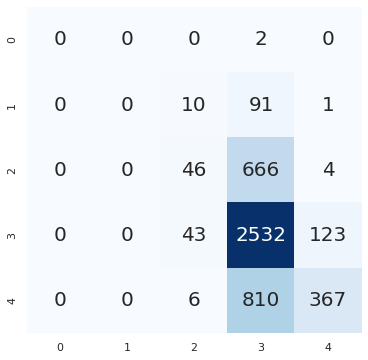

In [ ]:
class_names=[1,2,3,4,5]
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', annot_kws={"size": 20}, fmt="g", cbar=False);

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)));

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')));
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')));
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')));

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')));
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')));
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')));

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')));
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')));
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')));

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3','Class 4', 'Class 5']));


Accuracy: 0.63

Micro Precision: 0.63
Micro Recall: 0.63
Micro F1-score: 0.63

Macro Precision: 0.36
Macro Recall: 0.26
Macro F1-score: 0.26

Weighted Precision: 0.61
Weighted Recall: 0.63
Weighted F1-score: 0.55

Classification Report

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00         2
     Class 2       0.00      0.00      0.00       102
     Class 3       0.44      0.06      0.11       716
     Class 4       0.62      0.94      0.74      2698
     Class 5       0.74      0.31      0.44      1183

    accuracy                           0.63      4701
   macro avg       0.36      0.26      0.26      4701
weighted avg       0.61      0.63      0.55      4701



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

El modelo no resultó ser muy apropiado. Haremos lo mismo, pero esta vez rankearemos el user_score.

In [ ]:
df_filtered_users = df_filtered_alternative.copy()
df_filtered_users['ranking'] = pd.NaT
df_filtered_users['ranking'].mask(df_filtered_users['user_score'] >= 8.0 ,'Great', inplace=True)
df_filtered_users['ranking'].mask(df_filtered_users['user_score'] < 8.0 ,'Good', inplace=True)
df_filtered_users['ranking'].mask(df_filtered_users['user_score'] < 6.0 ,'Regular', inplace=True)
df_filtered_users['ranking'].mask(df_filtered_users['user_score'] < 4.0 ,'Bad', inplace=True)
df_filtered_users['ranking'].mask(df_filtered_users['user_score'] < 2.0 ,'Terrible', inplace=True)

In [ ]:

df_filtered_users['user_score'] = df_filtered_users['user_score'].fillna(0)
df_filtered_users['critics'] = df_filtered_users['critics'].fillna(0)
df_filtered_users['users'] = df_filtered_users['users'].fillna(0)
df_filtered_users['players'] = df_filtered_users['users'].fillna(0)
df_filtered_users['ranking'] = df_filtered_users['ranking'].fillna(0)

In [ ]:
print(df_filtered_users.isna().sum(axis=0))

name            0
platform        0
company         0
release_date    0
score           0
user_score      0
players         0
critics         0
users           0
year            0
genre           0
developer       0
ranking         0
test            0
dtype: int64


In [ ]:
df_filtered_users

,name,platform,company,release_date,score,user_score,players,critics,users,year,genre,developer,ranking,test
game_ID,,,,,,,,,,,,,,
1,The Legend of Zelda: Ocarina of Time,Nintendo64,Nintendo,1998-11-23,99,9.1,5749.0,22.0,5749.0,1998,Action Adventure,Nintendo,Great,5
2,Tony Hawk's Pro Skater 2,PlayStation,Sony,2000-09-20,98,7.4,647.0,19.0,647.0,2000,Sports,NeversoftEntertainment,Good,5
4,Red Dead Redemption 2,XboxOne,Microsoft,2018-10-26,97,7.8,3186.0,33.0,3186.0,2018,Action Adventure,RockstarGames,Good,5
5,Grand Theft Auto V,XboxOne,Microsoft,2014-11-18,97,7.8,1285.0,14.0,1285.0,2014,Action Adventure,RockstarNorth,Good,5
6,Grand Theft Auto V,PlayStation3,Sony,2013-09-17,97,8.3,4568.0,50.0,4568.0,2013,Modern,RockstarNorth,Great,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16982,Vroom in the Night Sky,Switch,Nintendo,2017-04-05,17,3.1,105.0,15.0,105.0,2017,Sports,Poisoft,Bad,1
16983,Leisure Suit Larry: Box Office Bust,PlayStation3,Sony,2009-05-05,17,1.9,45.0,11.0,45.0,2009,Action Adventure,Team17,Terrible,1
16984,Yaris,Xbox360,Microsoft,2007-10-10,17,4.3,129.0,7.0,129.0,2007,Driving,BackboneEntertainment,Regular,1


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_processed_2 = df_filtered_users.copy()
df_processed_2['company'] = le.fit_transform(df_processed_2['company'])
df_processed_2['platform'] = le.fit_transform(df_processed_2['platform'])
df_processed_2['genre'] = le.fit_transform(df_processed_2['genre'])

In [ ]:
df_logistic_2 = df_processed_2[['company','platform', 'genre', 'score','user_score','critics','users','test']]

In [ ]:
print(df_logistic_2.isna().sum(axis=0))

company       0
platform      0
genre         0
score         0
user_score    0
critics       0
users         0
test          0
dtype: int64


In [ ]:
df_logistic_2 = df_logistic_2.replace('tbd', 0)

In [ ]:
df_logistic_2

,company,platform,genre,score,user_score,critics,users,test
game_ID,,,,,,,,
1,2,4,3,99,9.1,22.0,5749.0,5
2,3,7,50,98,7.4,19.0,647.0,5
4,1,17,3,97,7.8,33.0,3186.0,5
5,1,17,3,97,7.8,14.0,1285.0,5
6,3,9,32,97,8.3,50.0,4568.0,5
...,...,...,...,...,...,...,...,...
16982,2,12,50,17,3.1,15.0,105.0,1
16983,3,9,3,17,1.9,11.0,45.0,1
16984,1,16,14,17,4.3,7.0,129.0,1


In [ ]:
df_logistic_2['test'] = df_logistic_2['test'].astype(str).astype(int)
df_logistic_2['critics'] = df_logistic_2['critics'].astype(int)
df_logistic_2['users'] = df_logistic_2['users'].astype(int)

In [ ]:
df_logistic_2.dtypes

company         int64
platform        int64
genre           int64
score           int64
user_score    float64
critics         int64
users           int64
test            int64
dtype: object

In [ ]:
df_logistic_2 = drop_outlayer(df_logistic_2['users'], df_logistic_2)

In [ ]:
df_logistic_2

,company,platform,genre,score,user_score,critics,users,test
game_ID,,,,,,,,
26,1,15,31,96,8.0,33,91,5
32,3,8,50,95,7.5,25,66,5
33,2,2,50,95,6.8,16,38,5
44,3,8,50,94,7.3,23,49,5
50,3,8,50,94,8.2,29,147,5
...,...,...,...,...,...,...,...,...
16981,1,16,2,17,1.5,19,58,1
16982,2,12,50,17,3.1,15,105,1
16983,3,9,3,17,1.9,11,45,1


In [ ]:
X = df_logistic_2.drop(columns=['score','user_score','test'])
y = df_logistic_2['test']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
logreg = LogisticRegression(max_iter = 10000, solver = 'newton-cg')

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='newton-cg')

In [ ]:
y_pred = logreg.predict(X_test)

y_pred

array([4, 4, 4, ..., 4, 4, 4])

In [ ]:
logreg.score(X_test, y_test)

0.6202074875958502

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[   0,    0,    0,    1,    1],
       [   0,    0,    0,  102,    1],
       [   0,    0,    0,  782,   13],
       [   0,    0,    0, 2677,   79],
       [   0,    0,    0,  705,   73]])

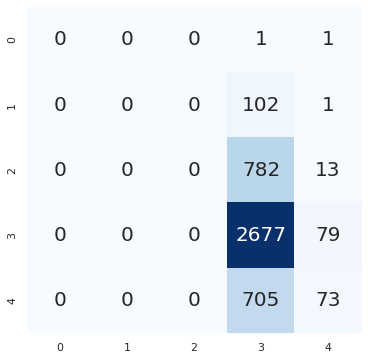

In [ ]:
class_names=[1,2,3,4,5]
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', annot_kws={"size": 20}, fmt="g", cbar=False);

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)));

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')));
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')));
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')));

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')));
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')));
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')));

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')));
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')));
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')));

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3','Class 4', 'Class 5']));


Accuracy: 0.62

Micro Precision: 0.62
Micro Recall: 0.62
Micro F1-score: 0.62

Macro Precision: 0.21
Macro Recall: 0.21
Macro F1-score: 0.18

Weighted Precision: 0.47
Weighted Recall: 0.62
Weighted F1-score: 0.50

Classification Report

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00         2
     Class 2       0.00      0.00      0.00       103
     Class 3       0.00      0.00      0.00       795
     Class 4       0.63      0.97      0.76      2756
     Class 5       0.44      0.09      0.15       778

    accuracy                           0.62      4434
   macro avg       0.21      0.21      0.18      4434
weighted avg       0.47      0.62      0.50      4434



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav